# Getting started with Task 3

Download the dataset from the [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106) using the script `download_intracardiac_dataset.sh`:

```bash
source download_intracardiac_dataset.sh
```

## Load Modules and Preprocessing Functions

Load modules and preprocessing functions.

In [1]:
import glob, re, os
import numpy as np
import matplotlib.pyplot as plt
from typing import List

Load the `cardiac_ml_tools` module.

In [2]:
%run cardiac_ml_tools.py

## Load the dataset

In [3]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
DIR='../Datasets/intracardiac_dataset/' # This should be the path to the intracardiac_dataset, it can be downloaded using data_science_challenge_2023/download_intracardiac_dataset.sh
for x in os.listdir(DIR):
    if re.match(regex, x):
        data_dirs.append(DIR + x)
file_pairs = read_data_dirs(data_dirs)
print('Number of file pairs: {}'.format(len(file_pairs)))
# example of file pair
print("Example of file pair:")
print("{}\n{}".format(file_pairs[1][0], file_pairs[1][1]))


# How much data is there in each file pair ?
data_from_file1 = np.load(file_pairs[1][0])
data_from_file2 = np.load(file_pairs[1][1])
print(data_from_file1.shape)
print(data_from_file2.shape)

# This means, each data pair contains one specific patients data/one specific data sample.
# How can we load this ? This data is obviously too big


Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sort

Number of file pairs: 16116
Example of file pair:
../Datasets/intracardiac_dataset/data_hearts_dd_0p2\pECGData_hearts_dd_0p2_volunteer.v10_pattern.10.npy
../Datasets/intracardiac_dataset/data_hearts_dd_0p2\VmData_hearts_dd_0p2_volunteer.v10_pattern.10.npy
(500, 10)
(500, 75)


Case 213 : ../Datasets/intracardiac_dataset/data_hearts_dd_0p2\pECGData_hearts_dd_0p2_volunteer.v1_pattern.19.npy


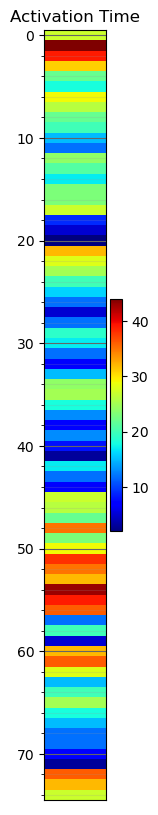

In [4]:
# Example of file pair
case = 213
plt.figure(figsize=(1, 10))

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

ActTime = get_activation_time(VmData)

# plot the Activation Time array
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
# not xticks
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


## Task 3: Learning the mapping from the 12-lead ECG to the activation map

Case 213 : ../Datasets/intracardiac_dataset/data_hearts_dd_0p2\pECGData_hearts_dd_0p2_volunteer.v1_pattern.19.npy
Case 213 : ../Datasets/intracardiac_dataset/data_hearts_dd_0p2\pECGData_hearts_dd_0p2_volunteer.v1_pattern.19.npy


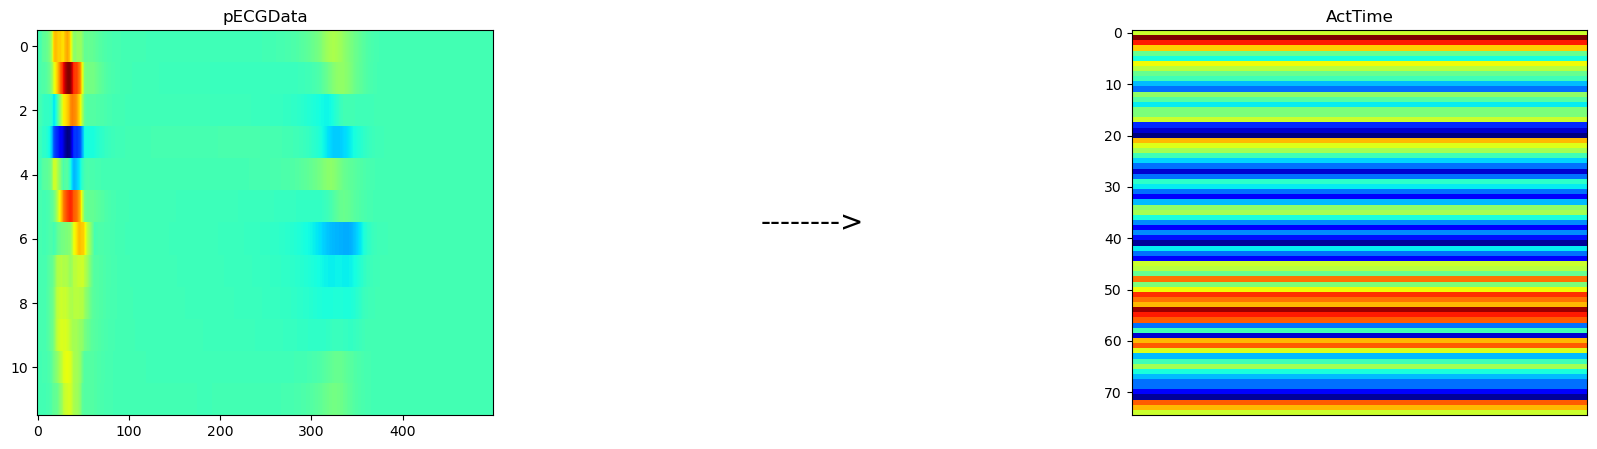

In [5]:
# make a plot with the "pECGData" -> "ActTime"
case = 213

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])
ActTime = get_activation_time(VmData)

# plot in row the tensors pECGData and ActTime with an arrow pointing to the activation time
row = 1
column = 3
plt.figure(figsize=(20, 5))
plt.subplot(row, column, 1)
# plot pECGData transposed
plt.imshow(pECGData.T, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('pECGData')
plt.subplot(row, column, 2)
# print an arrow
plt.text(0.5, 0.5, '-------->', horizontalalignment='center', verticalalignment='center', fontsize=20)
plt.axis('off')
plt.subplot(row, column, 3)
# plot ActTime
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
# not xticks
plt.xticks([])
plt.title('ActTime')
plt.show()
plt.close()

# Tricks

- As in many machine learning problems, normalization of the data might be helpful or even necessary. Different normalization schemes might be applied.

In [ ]:
# What can we say about the data ?

# The activation times for different patients lies between 0 and 100 milliseconds
# The \min_{j} V_ij for j \in [0,500] detects the activation time for each 

# What is our objective ?


# What are we going to use ?

In [8]:
# How is the model for the RNN going to be

# We need to define the input shape
# Then we need to define the output shape
# Then we need to define the model!
from torch import nn
import torch
from torch import optim

class RNN(nn.Module):
    def __init__(self, inpDim, outDim):
        super().__init__()
        self.EcgStack = nn.Sequential(
            nn.Linear(inpDim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, inpDim),
            nn.ReLU(),
            nn.Softmax()
        )
        self.VoltageStack = nn.Sequential(
            nn.Linear(inpDim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, outDim),
            nn.ReLU(),
            nn.Softmax()
        )
        
    def forward(self, Vinp, EcgInp):
        # Let's have input aggregated for both the Voltage
        
        # If train vs if not-train
        VoltageOutput = []
        EcgOutput = []
        if self.train:
            for i in range(500):
                if i != 499:
                    EcgOutput.append(self.EcgStack(EcgInp[i,:]))

                VoltageOutput.append(self.VoltageStack(EcgInp[i, :]))
                
        if not self.train:

            # Just take the first step
            for i in range(500):
                EcgOutput.append(EcgInp)
                EcgOp = self.ecgStack(EcgInp)
                EcgOutput.append(EcgOp)
                EcgInp = EcgOutput
                VOp = self.VoltageStack(Vinp)
                VoltageOutput.append(Vinp)
                VoltageOuput.append(VOp)
                Vinp = VOp
                
        
        return torch.stack(VoltageOutput, axis=0), torch.stack(EcgOutput, axis=0)
    
    

In [9]:
# Let's see if the network works
model = RNN(inpDim = 12, outDim=75)
model.train()
Voltage, ecg = model(torch.from_numpy(get_standard_leads(data_from_file1)).float(), torch.from_numpy(get_standard_leads(data_from_file2)).float())

# Alright, if it works, create the optimizer
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

In [ ]:
# Now let's start training the stuff


# Iterate over the data
for i, file_pair in enumerate(file_pairs):
    torchEcg, torchVoltage = torch.from_numpy(get_standard_leads(np.load(file_pair[0]))), torch.from_numpy(np.load(file_pair[1]))
    torchEcg, torchVoltage = torch.nn.functional.normalize(torchEcg, p=2., dim=1),torch.nn.functional.normalize(torchVoltage, p=2., dim=1)
    torchNVoltage, torchNEcg = model(torchVoltage.float(), torchEcg.float())
    loss = torch.mean(torch.square(torchNEcg - torchEcg[1:,:])) + torch.mean(torch.square(torchNVoltage - torchVoltage))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 100 == 0:    
        print('Loss: '+str(loss.item()) +' iterate: ' +str(i))

    
    
    

Loss: 0.09426942024202509 iterate: 0
Loss: 0.08925387968531821 iterate: 100
Loss: 0.08907998053269355 iterate: 200
Loss: 0.09755918667275049 iterate: 300
Loss: 0.05670101001765812 iterate: 400
Loss: 0.05958109954846244 iterate: 500
Loss: 0.08668559768800828 iterate: 600
Loss: 0.06991671835122053 iterate: 700
Loss: 0.06267826577505839 iterate: 800
Loss: 0.08062477975651129 iterate: 900
Loss: 0.07876875580270815 iterate: 1000
Loss: 0.05586260132307038 iterate: 1100
Loss: 0.0701003551282364 iterate: 1200
Loss: 0.07639827992203721 iterate: 1300
Loss: 0.08636043213034625 iterate: 1400
Loss: 0.054666861418231516 iterate: 1500
Loss: 0.06557736813250738 iterate: 1600
Loss: 0.05657956988746459 iterate: 1700
Loss: 0.06622687094779495 iterate: 1800
Loss: 0.07741836840403249 iterate: 1900
Loss: 0.08005514619586163 iterate: 2000
Loss: 0.05919028784077552 iterate: 2100
Loss: 0.06464573815228279 iterate: 2200
Loss: 0.04987276175446674 iterate: 2300
Loss: 0.06333410326930897 iterate: 2400
Loss: 0.0707